In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Descripción del DataSet principal.
Este conjunto de datos contiene una lista completa de las canciones más famosas de 2023 enumeradas en Spotify. El conjunto de datos ofrece una gran cantidad de características más allá de las que normalmente están disponibles en conjuntos de datos similares. Proporciona información sobre los atributos, la popularidad y la presencia de cada canción en varias plataformas de música. El conjunto de datos incluye información como el nombre de la pista, el nombre del artista, la fecha de lanzamiento, las listas de reproducción y gráficos de Spotify, estadísticas de transmisión, presencia de Apple Music, presencia de Deezer, gráficos de Shazam y varias funciones de audio.

# 1.1 Carga de los datos del DataSet:

In [2]:
# Primero vamos hacer una carga de los datos para mostrar las columnas que hay en el dataframe.

datos_canciones = 'spotify_2023.csv'  
df = pd.read_csv(datos_canciones, encoding='latin1')

## Vista del DataSet

In [3]:
# Vamos a ver el dataset principal. 

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Información del DataSet

In [4]:
# Vamos a ver la información del dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Columnas del DataSet

In [5]:
# A continucación podemos ver las entidades de las columnas que contiene el dataset.
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

# 2. Data Wrangling

# 2.1 Manejo de Datos Faltantes:

In [6]:
# 1.1 Manejo de Datos Faltantes
df.isnull().sum()  # Verificar datos faltantes en cada columna

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Aca podemos identificar que las columnas 'in_shazam_charts' y 'key' contiene valores nulos los cuales trabaje para que 
en el analisis no exista valores NaN

## Estadistica para los datos faltantes

In [7]:
# Eliminar comas y convertir la columna 'in_shazam_charts' a tipo numérico
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '').astype(float)

In [8]:
# A continucación vamos a rellenar los datos faltantes con la mediana de las siguientes columnas: in_shazam_charts 

avg_in_shazam_charts = df['in_shazam_charts'].median()
print("Mediana de la columna in_shazam_charts: ", avg_in_shazam_charts)
# Rellenar los valores nulos en 'in_shazam_charts' con la mediana

df['in_shazam_charts'].fillna(avg_in_shazam_charts, inplace = True)

Mediana de la columna in_shazam_charts:  2.0


In [9]:
print("Mediana de la columna in_shazam_charts: ", avg_in_shazam_charts)

Mediana de la columna in_shazam_charts:  2.0


## Eliminación de la columna 'Key'

Lo que hice fue eliminar esta columna ya que no me brindaba información importante con respecto al analisis que estoy llevando

In [10]:
# A continucación elimine la columna key del dataframe ya que no lo veo necesario para el analisis que quiero abordar. 

df.drop('key', axis=1, inplace=True)

In [11]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,826.0,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,382.0,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,949.0,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,548.0,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,425.0,144,Minor,65,23,80,14,63,11,6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  mode                  9

Este paso nos permite enfocarnos en canciones más recientes, lo que puede ser crucial para analizar las tendencias actuales y realizar predicciones más precisas.

In [27]:
# Filtrar solo las canciones lanzadas después del año 2000
df_recent = df[df['release_date'] > '2000-01-01']

# Ordenar el DataFrame filtrado por 'release_date' de manera descendente (las más recientes primero)
df_recent = df_recent.sort_values(by='release_date', ascending=False)

# Visualizar las primeras filas del conjunto de datos ordenado por fecha de lanzamiento
(df_recent[['track_name', 'artist(s)_name', 'release_date']].head())

,track_name,artist(s)_name,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023-07-14
58,S91,Karol G,2023-07-14
68,Overdrive,Post Malone,2023-07-14
30,Rush,Troye Sivan,2023-07-13
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",2023-07-13


La adición de esta nueva columna facilita la manipulación y visualización de las fechas de lanzamiento en un formato más legible y compatible para nuestro analisis, esto para poder tener una sola columna con la cual podamos analizar.

In [28]:
# Crear una nueva columna 'release_date_str' como cadena en formato 'YYYY-MM-DD'
df['release_date_str'] = df['release_date'].dt.strftime('%Y-%m-%d')

# Ordenar el DataFrame por 'release_date'
df = df.sort_values(by='release_date', ascending=False)

# Visualizar las primeras filas del conjunto de datos ordenado por fecha de lanzamiento
(df[['track_name', 'artist(s)_name', 'release_date']].head())

,track_name,artist(s)_name,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023-07-14
58,S91,Karol G,2023-07-14
68,Overdrive,Post Malone,2023-07-14
30,Rush,Troye Sivan,2023-07-13
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,2023-07-13


In [29]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,release_date_str
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,Major,80,89,83,31,0,8,4,2023-07-14,2023-07-14
58,S91,Karol G,1,525,41,16011326,34,115,39,6,...,Minor,86,42,72,59,0,9,19,2023-07-14,2023-07-14
68,Overdrive,Post Malone,1,410,36,14780425,36,32,31,1,...,Major,56,48,73,0,0,35,4,2023-07-14,2023-07-14
30,Rush,Troye Sivan,1,864,78,22581161,71,135,50,1,...,Minor,74,35,84,0,0,11,6,2023-07-13,2023-07-13
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,873,104,30546883,80,227,95,24,...,Major,44,14,9,96,0,10,3,2023-07-13,2023-07-13


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 439
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   in_spotify_playlists  953 non-null    int64         
 4   in_spotify_charts     953 non-null    int64         
 5   streams               953 non-null    object        
 6   in_apple_playlists    953 non-null    int64         
 7   in_apple_charts       953 non-null    int64         
 8   in_deezer_playlists   953 non-null    object        
 9   in_deezer_charts      953 non-null    int64         
 10  in_shazam_charts      953 non-null    float64       
 11  bpm                   953 non-null    int64         
 12  mode                  953 non-null    object        
 13  danceability_%        953

Este código nos ayuda a identificar las columnas que contienen datos categóricos en el conjunto de datos para saber las caracteristicas del DataSet.

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas Categóricas:", categorical_columns)

Columnas Categóricas: Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists',
       'mode', 'release_date_str'],
      dtype='object')


Este código asegura que la columna 'streams' se interprete correctamente como datos numéricos. La conversión a un formato numérico es esencial para realizar análisis estadísticos y modelado predictivo con esta variable.

In [33]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

Esta linea de codigo proporciona un resumen conciso pero informativo de las características estadísticas clave de las columnas numéricas en el DataFrame. Esto incluye tendencias centrales, dispersión y distribución de los datos.

In [35]:
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953
mean,1.556139,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,56.952781,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,2018-09-10 05:09:45.519412224
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-06-28 00:00:00
50%,1.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00
75%,2.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,33.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.893044,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,157.404449,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,NaN


La columna resultante, 'streams_log', ahora contiene los valores logarítmicos de 'streams', lo que puede facilitar la interpretación y modelado de los datos.

In [37]:
import numpy as np

# Aplicar la transformación logarítmica a la columna 'streams'
df['streams_log'] = np.log1p(df['streams'])

Esta visualización proporciona una perspectiva más robusta de la distribución de 'streams' al abordar la asimetría y manejar valores atípicos. En la presentación, se puede destacar cómo la transformación logarítmica ayuda a explorar la distribución de datos de manera más efectiva, proporcionando información valiosa sobre la variabilidad y la presencia de valores extremos.

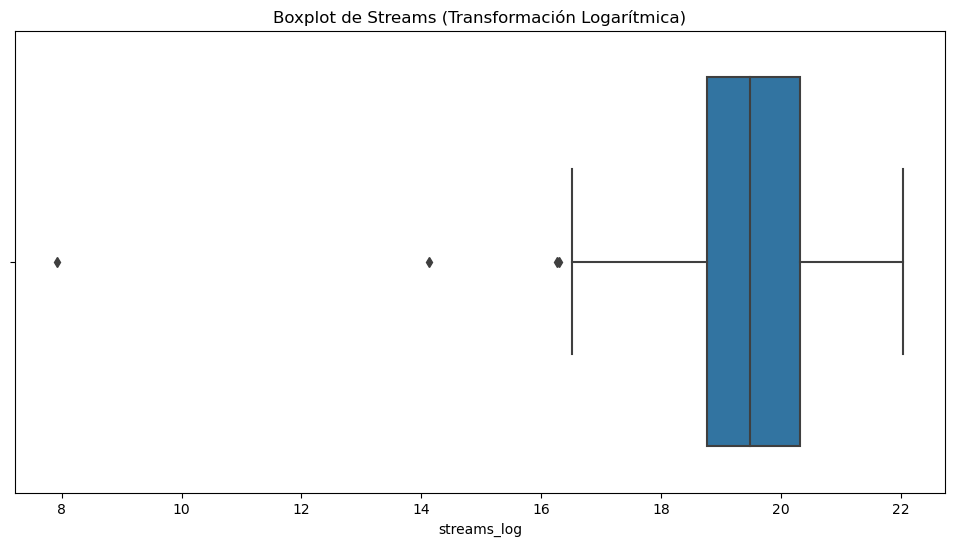

In [38]:
# Visualización de boxplots con la transformación logarítmica
plt.figure(figsize=(12, 6))
sns.boxplot(x='streams_log', data=df)
plt.title('Boxplot de Streams (Transformación Logarítmica)')
plt.show()

Permite visualizar qué canciones o artistas tienen un rendimiento significativamente diferente del resto en términos de 'streams' después de la transformación logarítmica.

In [39]:
# Establecer un umbral para identificar outliers
umbral_outliers = 5

# Identificar registros con 'streams_log' por encima del umbral
outliers = df[df['streams_log'] > umbral_outliers]

# Mostrar información sobre los registros identificados como outliers
print(outliers[['track_name', 'artist(s)_name', 'streams', 'streams_log']])

                                            track_name  \
0                  Seven (feat. Latto) (Explicit Ver.)   
58                                                 S91   
68                                           Overdrive   
30                                                Rush   
17   What Was I Made For? [From The Motion Picture ...   
..                                                 ...   
459           A Holly Jolly Christmas - Single Version   
466             Let It Snow! Let It Snow! Let It Snow!   
460  The Christmas Song (Merry Christmas To You) - ...   
469                                    White Christmas   
439                                    Agudo Mï¿½ï¿½gi   

                                        artist(s)_name      streams  \
0                                     Latto, Jung Kook  141381703.0   
58                                             Karol G   16011326.0   
68                                         Post Malone   14780425.0   
30                 

# 3. EDA

Streams: En el histograma de 'streams', el eje X muestra diferentes rangos de cantidad de streams, mientras que el eje Y indica cuántas canciones tienen un número de streams dentro de esos rangos.

BPM, Danceability, Valence, Energy: El eje X representa rangos de valores posibles para BPM, danceability, valence y energy, mientras que el eje Y indica cuántas canciones tienen sus valores dentro de esos rangos específicos.

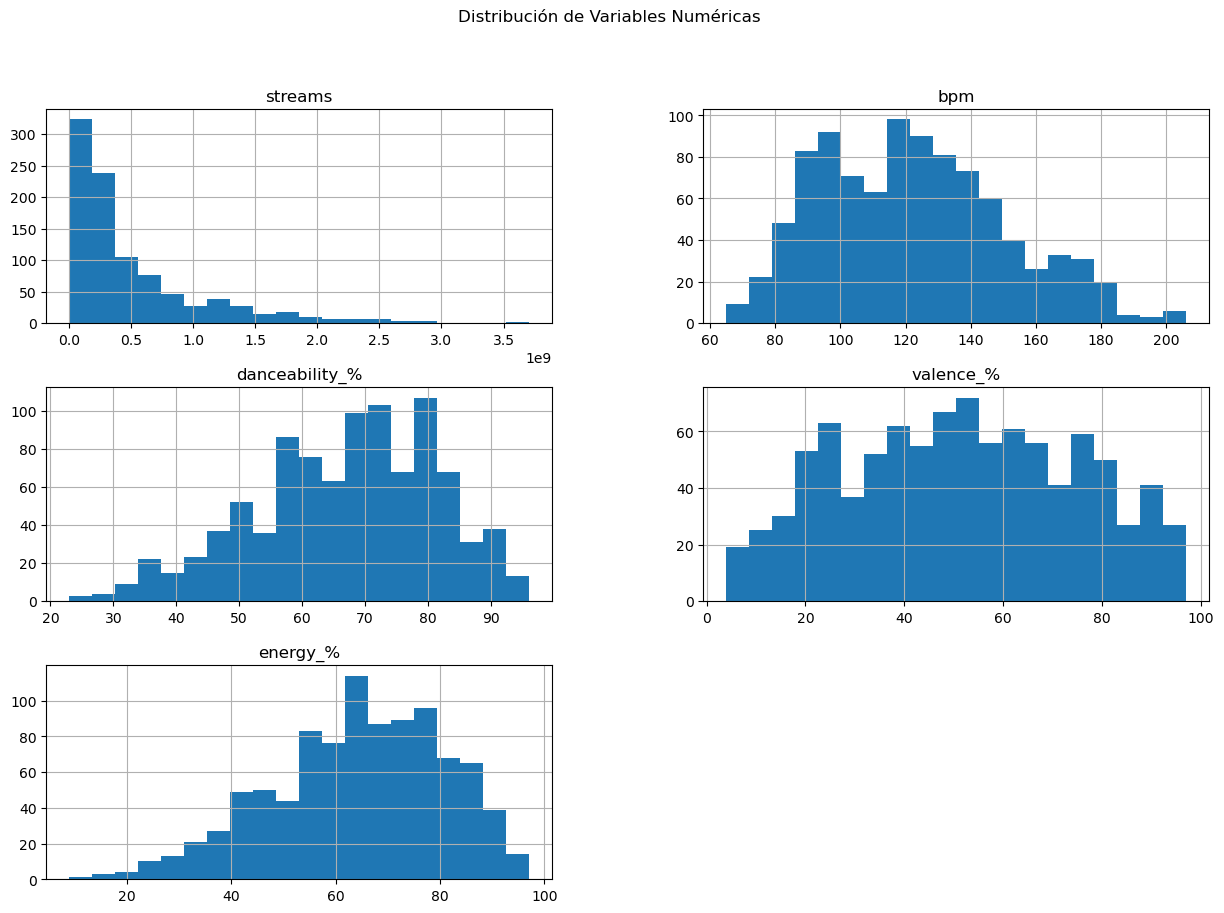

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para algunas variables numéricas
numeric_columns = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

Supervisión del Impacto: Ayuda a supervisar cómo ciertas características (como 'bpm' o 'energy_%') pueden afectar la popularidad de una canción medida por el número de streams.

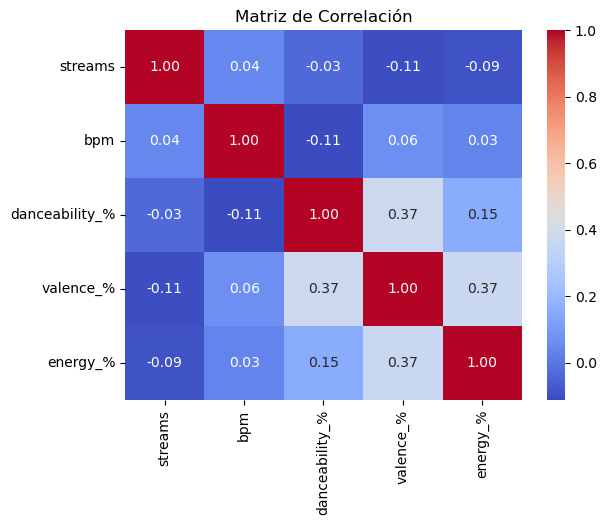

In [90]:
# Matriz de correlación
correlation_matrix = df[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Eje X (Streams): El eje horizontal representa el número de transmisiones (streams). Está dividido en intervalos o "bins" que agrupan las canciones según la cantidad de streams que han recibido.

Eje Y (Frecuencia): El eje vertical muestra la frecuencia o la cantidad de canciones en cada intervalo. Es decir, cuántas canciones tienen un número específico de streams.

Las barras muestran la frecuencia en cada intervalo, la linea muestra la forma general de la distribución de streams.

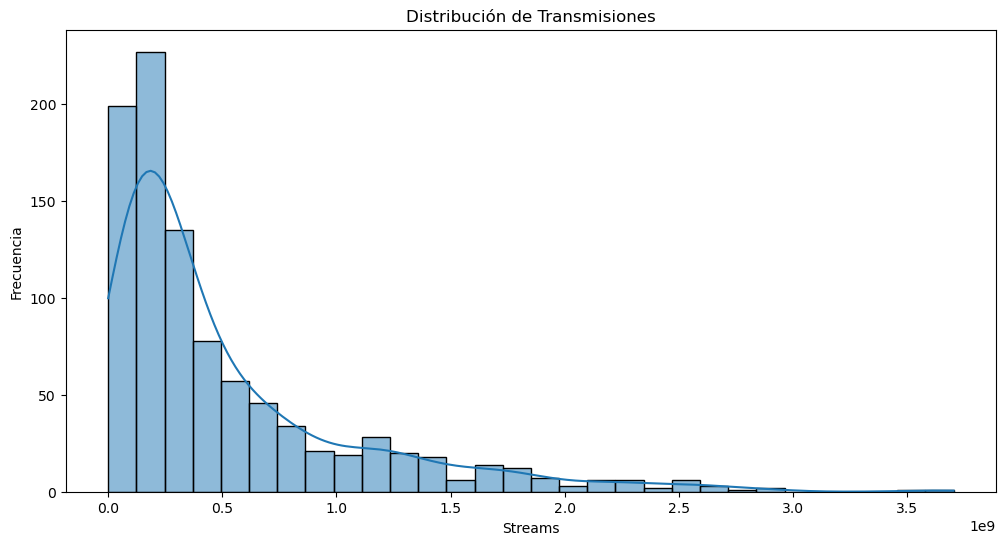

In [46]:
# Gráfico de barras para la distribución de las transmisiones
plt.figure(figsize=(12, 6))
sns.histplot(df['streams'], bins=30, kde=True)
plt.title('Distribución de Transmisiones')
plt.xlabel('Streams')
plt.ylabel('Frecuencia')
plt.show()


Eje X (En Listas de Reproducción de Spotify): Representa la cantidad de listas de reproducción de Spotify en las que una canción está presente.

Eje Y (Streams): Muestra el número de transmisiones (streams) de cada canción.

Puntos de Dispersión: Cada punto en el gráfico representa una canción, con su posición determinada por la cantidad de listas de reproducción de Spotify en las que está presente (eje X) y el número de streams que ha recibido (eje Y).

En resumen, el gráfico de dispersión con línea de regresión proporciona una visualización de la relación entre dos variables y ayuda a entender cómo la presencia en listas de reproducción de Spotify puede influir en el número de streams.

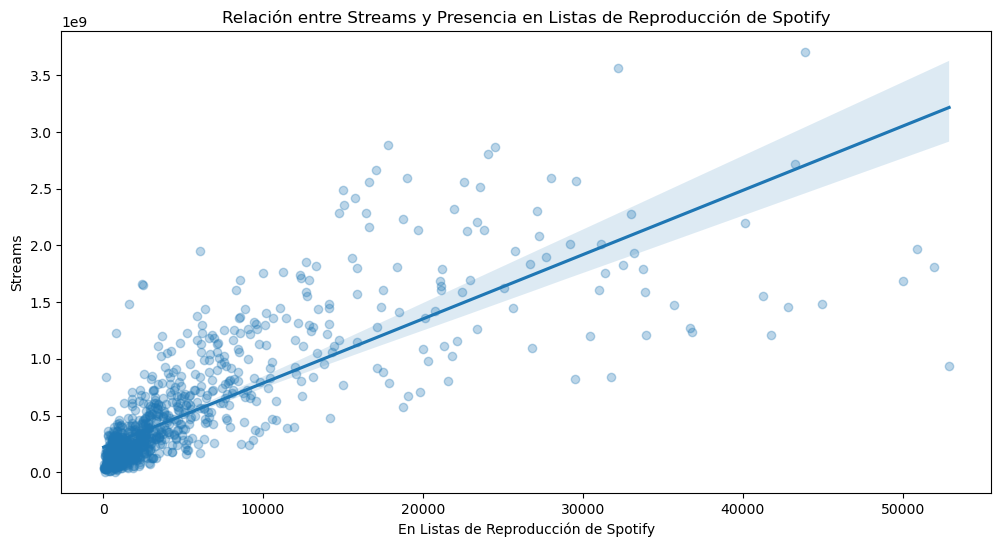

In [48]:
# Gráfico de dispersión con línea de regresión para la relación entre 'streams' y 'in_spotify_playlists'
plt.figure(figsize=(12, 6))
sns.regplot(x='in_spotify_playlists', y='streams', data=df, scatter_kws={'alpha':0.3})
plt.title('Relación entre Streams y Presencia en Listas de Reproducción de Spotify')
plt.xlabel('En Listas de Reproducción de Spotify')
plt.ylabel('Streams')
plt.show()

Eje X (En Listas de Reproducción de Apple Music): Representa la cantidad de listas de reproducción de Apple Music en las que una canción está presente.

Eje Y (Streams): Muestra el número de transmisiones (streams) de cada canción.

el gráfico de dispersión para la relación entre streams e in_apple_playlists ofrece una representación visual de cómo la presencia en listas de reproducción de Apple Music se relaciona con el número de streams.

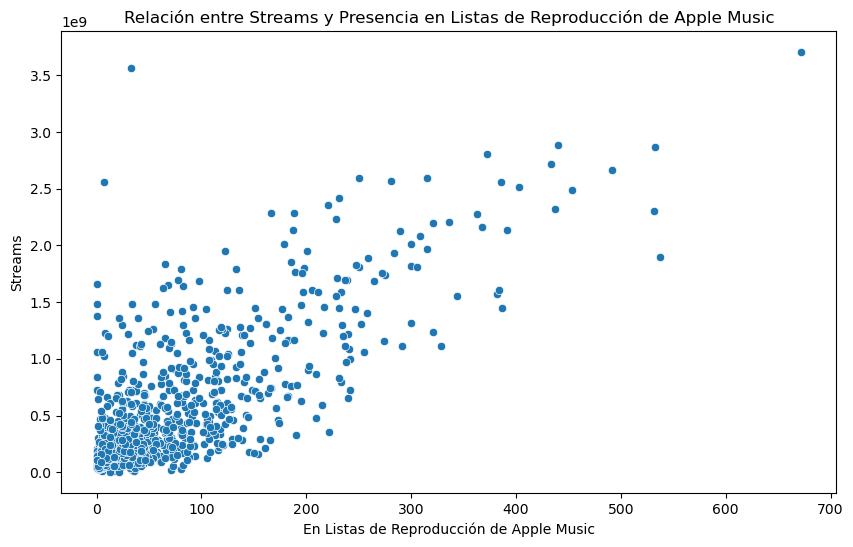

In [50]:
# Gráfico de dispersión para la relación entre 'streams' e 'in_apple_playlists'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='in_apple_playlists', y='streams', data=df)
plt.title('Relación entre Streams y Presencia en Listas de Reproducción de Apple Music')
plt.xlabel('En Listas de Reproducción de Apple Music')
plt.ylabel('Streams')
plt.show() 

Eje X (En Listas de Reproducción de Spotify): Representa la cantidad de listas de reproducción de Spotify en las que una canción está presente.

Eje Y (Streams): Muestra el número de transmisiones (streams) de cada canción.

El gráfico de dispersión para la relación entre streams e in_spotify_playlists ofrece una representación visual de cómo la presencia en listas de reproducción de Spotify se relaciona con el número de streams.

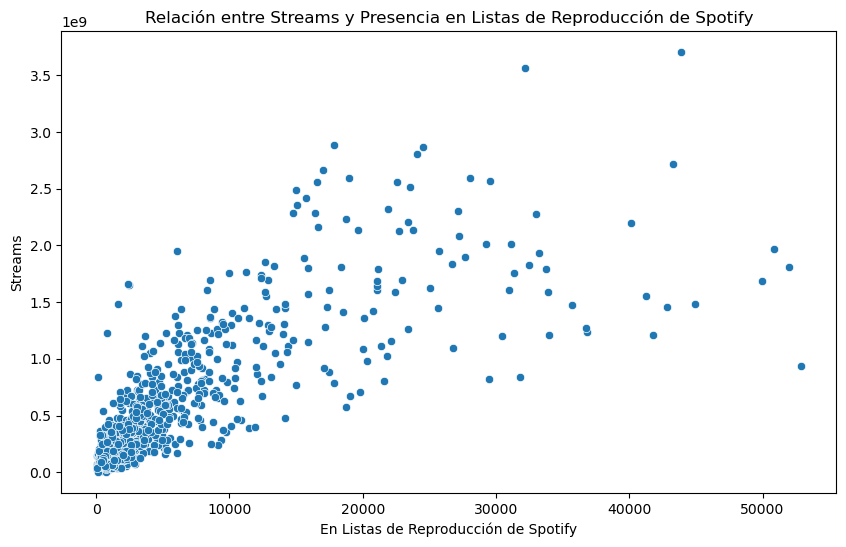

In [51]:
# Gráfico de dispersión para la relación entre 'streams' e 'in_apple_playlists'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='in_spotify_playlists', y='streams', data=df)
plt.title('Relación entre Streams y Presencia en Listas de Reproducción de Spotify')
plt.xlabel('En Listas de Reproducción de Spotify')
plt.ylabel('Streams')
plt.show()

Eje X (Año de Lanzamiento): Representa los años en los que se lanzaron las canciones.

Eje Y (Número de Canciones): Muestra la cantidad de canciones lanzadas en cada año.

Alturas de las Barras: La altura de cada barra indica el número de canciones lanzadas en un año específico.

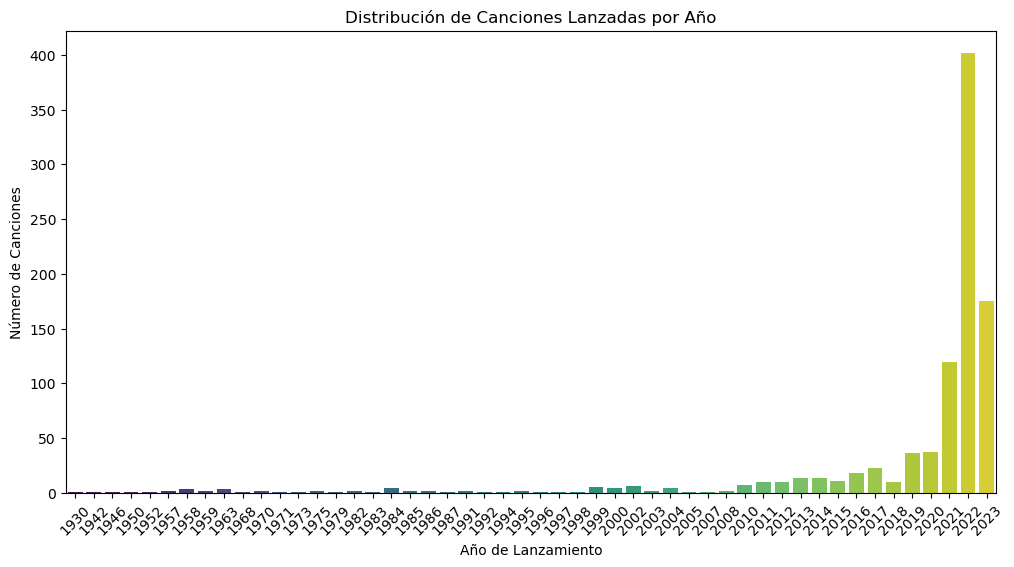

In [52]:
# Crear un gráfico de barras para la distribución de canciones lanzadas por año
plt.figure(figsize=(12, 6))
df['release_year'] = df['release_date'].dt.year
sns.countplot(x='release_year', data=df, palette='viridis')
plt.title('Distribución de Canciones Lanzadas por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45)
plt.show()

# 4. Modelado

In [91]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

R² (Coeficiente de Determinación): El valor de R² es 0.558, lo que significa que el modelo explica aproximadamente el 55.8% de la variabilidad en la variable de respuesta 'streams'. Este valor indica una moderada capacidad del modelo para explicar las variaciones en las transmisiones.

Significancia del Modelo: El valor p asociado al estadístico F (Prob (F-statistic)) es muy bajo (1.14e-115), indicando que el modelo en su conjunto es significativo. Es decir, al menos una de las variables predictoras tiene un efecto significativo en las transmisiones.

In [92]:
# Seleccionar las variables predictoras y la variable de respuesta
var_indepen = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists',
               'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts',
               'bpm', 'danceability_%', 'valence_%', 'energy_%',
               'acousticness_%', 'instrumentalness_%']  

# Agregar las variables del modo musical

var_depen = ['streams']

# Crear un DataFrame de características potenciales
X = df[var_indepen]
y = df[var_depen]

# Agregar una constante a la matriz de características
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X)
results = model.fit()

# Imprimir los resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     73.76
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.14e-115
Time:                        14:28:47   Log-Likelihood:                -14450.
No. Observations:                 715   AIC:                         2.893e+04
Df Residuals:                     702   BIC:                         2.899e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.328e+07 

In [93]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión lineal múltiple utilizando solo los datos de entrenamiento
model = sm.OLS(y_train, X_train)
results = model.fit()

# Imprimir los resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     53.71
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           3.26e-81
Time:                        14:30:53   Log-Likelihood:                -10082.
No. Observations:                 500   AIC:                         2.019e+04
Df Residuals:                     487   BIC:                         2.024e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.125e+08 

# Valores reales vs Valores Ajustados

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9412\2733077246.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Valor Real")
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9412\2733077246.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

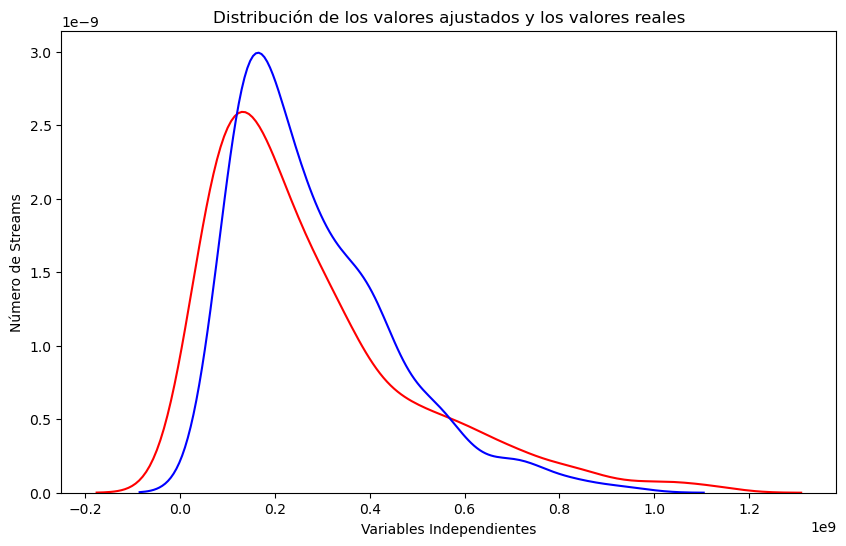

In [94]:
# Crear un modelo de regresión lineal y ajustarlo con los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores de streams con los datos de prueba
y_pred = model.predict(X_test)

# Obtener las predicciones para todo el conjunto de datos
Y_hat = model.predict(X)

# Graficar la distribución de los valores ajustados y los valores reales
width = 10
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y, hist=False, color="r", label="Valor Real")
sns.distplot(y_pred, hist=False, color="b", label="Valor Ajustado", ax=ax1)

plt.title('Distribución de los valores ajustados y los valores reales')
plt.xlabel('Variables Independientes')
plt.ylabel('Número de Streams')

plt.show()
plt.close()